<a href="https://colab.research.google.com/github/mabittar/Portfolio/blob/master/Detec%C3%A7%C3%A3o_de_Fraude_em_CC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito

A utilização de inteligência artificial pode ser um instrumento no combate e identificação dessas transações não permitidas, pishing, lavagem de dinheiro entre outras operações fraudulentas que colocam em  dúvida todo o sistema finaceiro e são uma ameaça real a economia global.

É importante que companhias de cartões de crédito consigam identificar transações fraudulentas para que os consumidores não sejam cobrados por itens que não efetuaram a compra. A partir da análise de transações anteriores o sistema consegue comparar se a transação efetuada enquadra-se numa transação real ou num desvio financeiro.

Segundo o [SERASAEXPERIAN](https://www.serasaexperian.com.br/sala-de-imprensa/indicador-de-tentativas-de-fraude-encerra-2017-com-o-maior-resultado-dos-ultimos-tres-anos-revela-serasa): "Brasil tem uma tentativa a cada 16 segundos. Com a proximidade do Carnaval, consumidor precisa ficar atento para não se tornar vítima; especialistas da Serasa dão dicas para cair na folia com segurança"

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, pois dentro do contexto as fraudes envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acarretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.
<p align=center>
<img src="https://www.orangevillepolice.ca/wp-content/uploads/2019/07/Credit-Card-Fraud-Alert-848x280.jpg"></p>

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 



## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas europeias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/54.jpg" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor ou igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

###Importando o dataset diretamente do Kraggle

In [1]:
!pip install kaggle;

from google.colab import files
files.upload() #enviar o arquivo kaggle.json

#antes de importar o dataset nós iremos provisionar o local de armazenamento
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#Alterar a permissão para evitar o aviso durante a partida da ferramenta Kaggle
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

#Aceitar a competição e copiar o endereço da API para o download do dataset
!kaggle datasets download -d mlg-ulb/creditcardfraud

#Descompactar o arquivo baixado
!unzip \*.zip  && rm *.zip

Saving kaggle.json to kaggle.json
 64% 42.0M/66.0M [00:00<00:00, 49.4MB/s]
100% 66.0M/66.0M [00:00<00:00, 103MB/s] 
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [2]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [3]:
file_path = "/content/creditcard.csv"

# importar os dados para um dataframe

df = pd.read_csv(file_path)


Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise Exploratória

### Verificando Entradas

Após a importar os dados vamos verificar nosso dataset:

In [4]:
#vamos observar as 5 primeiras entradas do nosso dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Conforme comentado anteriormente as variáveis não possuem nomenclatura devido a confidencialidade  dos dados.

Podemos observar que a maior parte das colunas já estão com os dados normalizados.

A variável que classifica as transações entre reais ou falsas é a coluna Class que iremos explorar adiante.

### Resumo estatístico do dataset

In [5]:
#vamos observar o resumo estatístico do dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


O dataset possui 284.807 entradas.

Em relação a variável `amount` observarmos que a médias das transações é de 88.34, sendo a menor 5.6 e a maior 25.691

### Verificando valores ausentes

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64

Ótimo! Não temos valores ausentes no nosso dataset.

### Verificando visualmente a distribuição do nosso dataset

#### Distribuição das variáveis

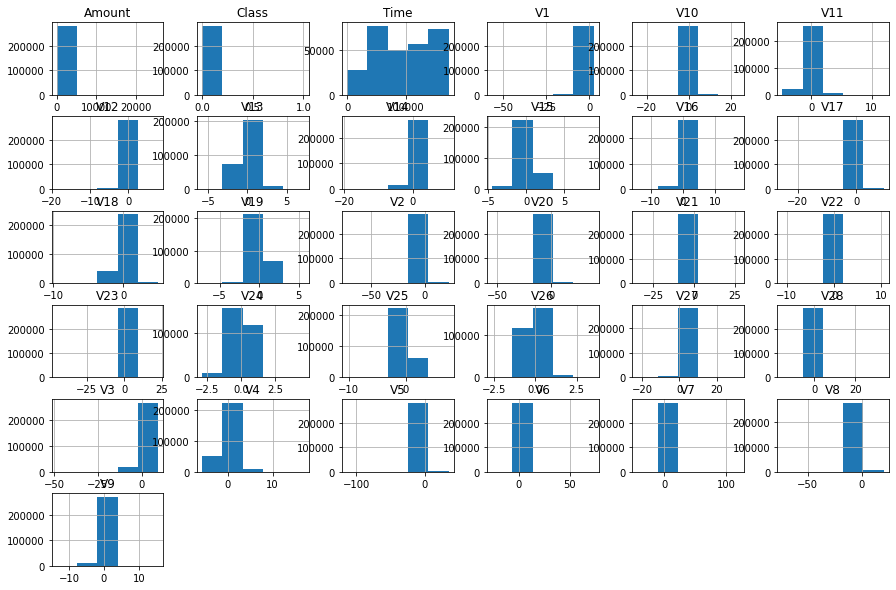

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 5, figsize=(15,10));

Podemos observar visualmente  que as variáveis do dataset estão regularizadas, praticamente todos histogramas apresentam valores normalizados

#### Distribuição das classes

0    284315
1       492
Name: Class, dtype: int64

Fraudes representam 0.17% do dataset.



[]

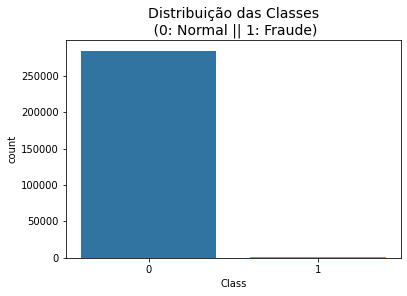

In [8]:
# balanceamento das classes
print(df.Class.value_counts())
print("\nFraudes representam {:.2f}% do dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

# plotar gráfico de barras para as Classes
fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax)
ax.set_title('Distribuição das Classes\n (0: Normal || 1: Fraude)', fontsize=14)
plt.plot()

Como era esperando, estamos diante de um dataset desbalanceado e isso será um problema se não for tratado, pois a aproximadamente 99% das transações são reais. 

Porém ao utilizar base de dados desbalanceada podemos induzir o algoritmo  a uma análise enviesada o que impacta negativamente o modelo, inviabilizando assim o objetivo final de estimar transações fraudulentas.

Podemos plotar também no gráfico as transações distribuindo no tempo:

#### Distribuição no tempo

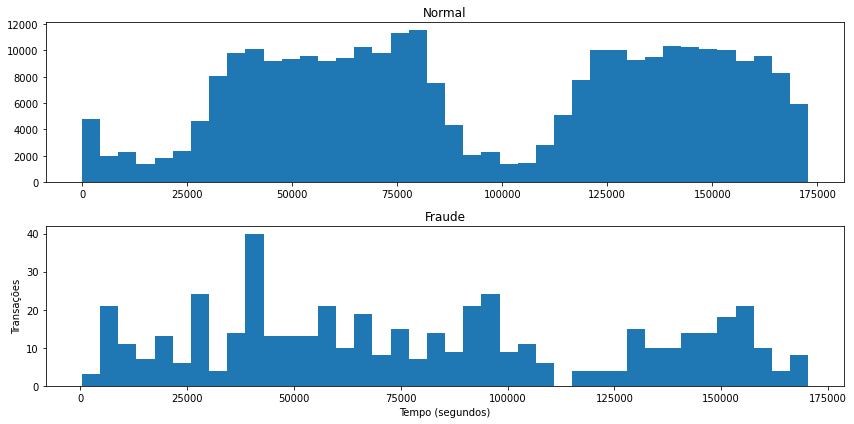

In [63]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

num_bins = 40

ax[0].hist(df.Time[df.Class == 0], bins=num_bins)
ax[0].set_title('Normal')

ax[1].hist(df.Time[df.Class == 1], bins=num_bins)
ax[1].set_title('Fraude')

plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()

#### Distribuição valor transações classificação x total

Nessa etapa iremos utilizar o `boxplot`da biblioteca Seaborn.

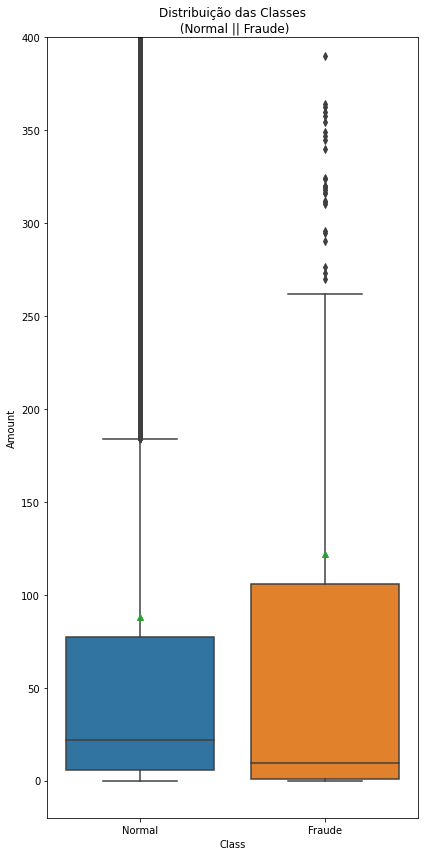

In [10]:
#instanciando o objeto
fig, ax = plt.subplots(figsize = (6,12))
#gerando dados para o gráfico
sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
plt.ylim((-20,400))
plt.xticks([0,1], ['Normal', 'Fraude'])
ax.set_title('Distribuição das Classes\n (Normal || Fraude)')
#plotando o gráfico
plt.tight_layout()

Nesse gráfico podemos verificar que as transações fraudulentas normalmente envolvem uma quantia maior de dinheiro.

#### Densidade de distribuição

O gráfico de densidade é muito útil para compararmos as distribuições de cada variável para cada classe e ver quais as mais importantes para detecção de anomalias.

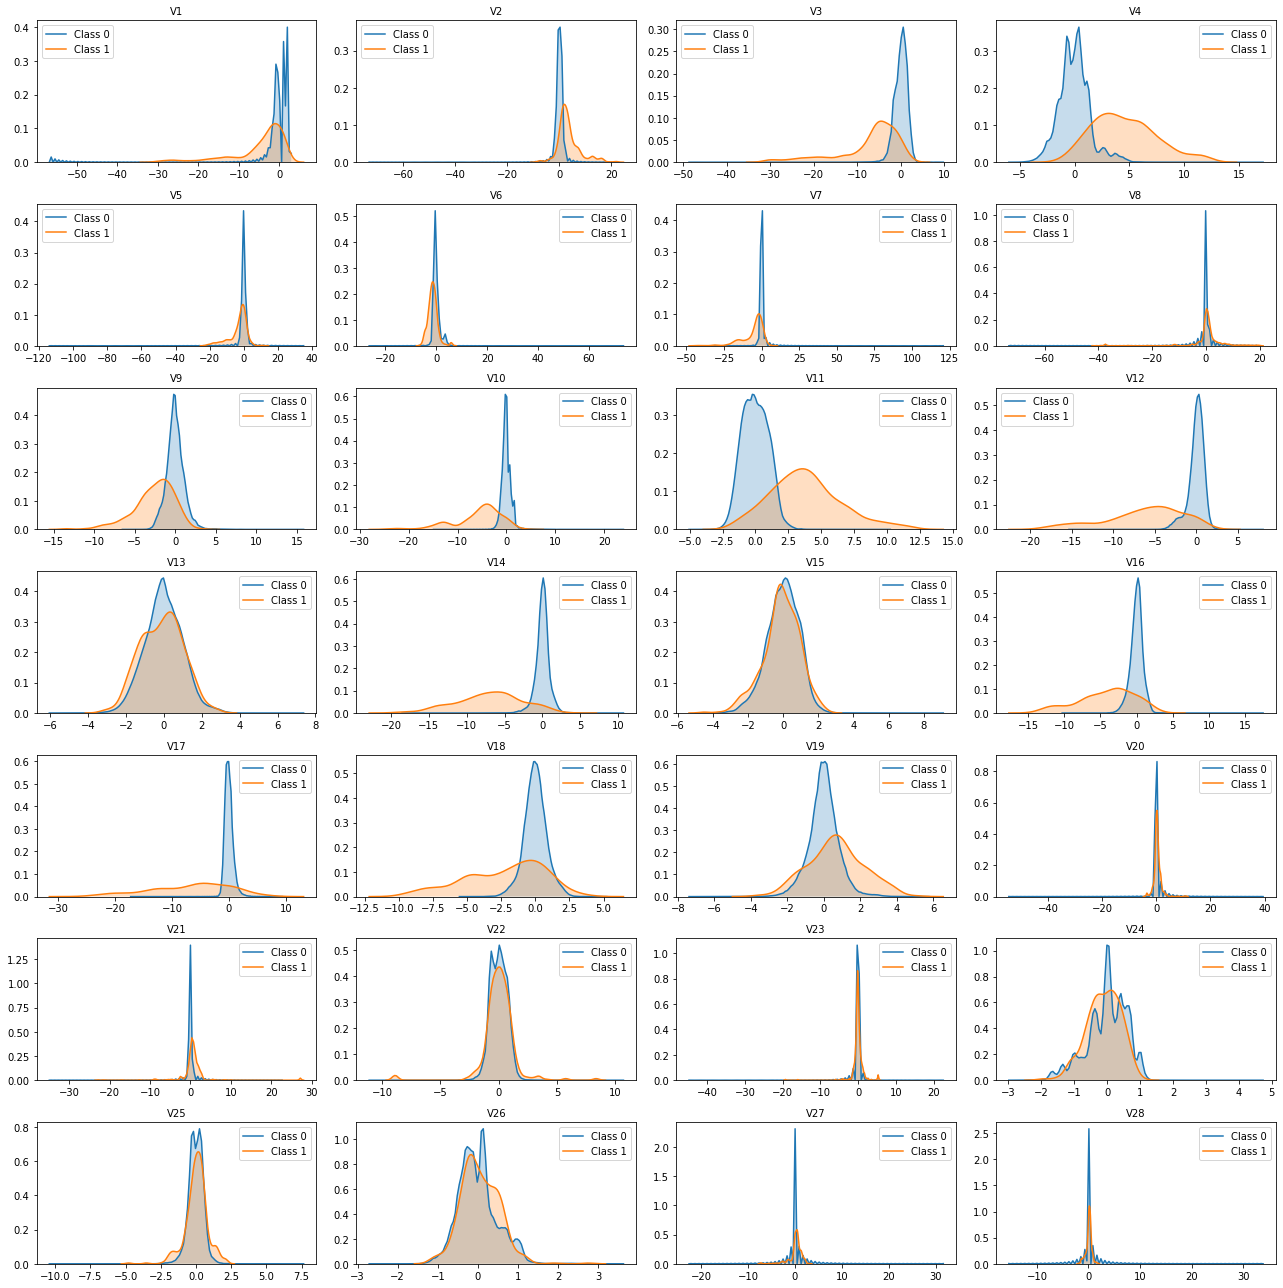

In [11]:
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout()

O que se procura nesse tipo de visualização são distribuições que diferem uma da outra, permitindo identificar fraudes mais facilmente. Veja como exemplo as variáveis `V3`, `V4`, `V10` e `V11`, como elas são bem distintas.

Por outro lado, variáveis como `V8`, `V13`, `V15`, `V20`, `V23` e `V25` são muito similares, apresentando aproximadamente o mesmo comportamento.

Após a análise exploratória podemos concluir:



*   O dataset está desbalanceado (apenas 0,17% das transações foram classificadas como fraude); 
*   Não existem valores nulos ou ausentes;
*   Parte das variáveis foram padronizadas.



## Preparação dos Dados


**Padronizar `Time` e `Amount`**

Para esta etapa, uma vez que a coluna `Amount` possui *outliers* será usada a padronização por meio da classe `StandardScaler`.

In [12]:
#criar um novo dataset por precaução
df_clean = df.copy()

Vamos importar as bibliotecas necessárias

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score


Padrozinar as variáveis `Time` e `Amount`

In [14]:
std_scaler = StandardScaler()
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1,1))
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))

df_clean.drop(['Amount', 'Time'], axis=1, inplace=True) 

Vamos ver como ficou nosso dataset:

In [15]:
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_time,std_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403


### Dividindo o dataset (treino e teste)
Como nesse dataset não foi nos foi apresentado a divisão entre treino e teste iremos fazer manualmente:

In [18]:
#separando as variáveis
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']

#dividindo o dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

### Balanceando o conjunto de dados

Usando a biblioteca `imblearn` é possível aplicar facilmente técnicas de balanceamento de dados. No caso, a opção neste projeto foi usar *Under-sampling*, preservando a classe minoritária.

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


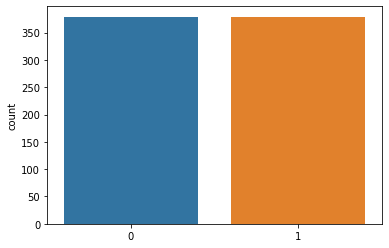

In [17]:
from imblearn.under_sampling import RandomUnderSampler

rand = RandomUnderSampler()
X_rand, y_rand = rand.fit_sample(X_train, y_train)

sns.countplot(y_rand);


A opção de usar o `Random Under Sample` consiste basicamente em remover os dados desbalanceados numa tentativa de balancear o dataset.

A preocupação nesse passo é que estamos eliminando grande parte das amostras (deixando praticamente 400 amostras do dataset original de 284.315 incialmente)

Entretanto agora estamos com os dados balanceados e podemos facilmente plotar  uma matriz de correlação entre os dados.

Apenas como comparativo, iremos plotar a matriz com os dados desbalanceados e posteriormente com os dados balanceados:

<function matplotlib.pyplot.show>

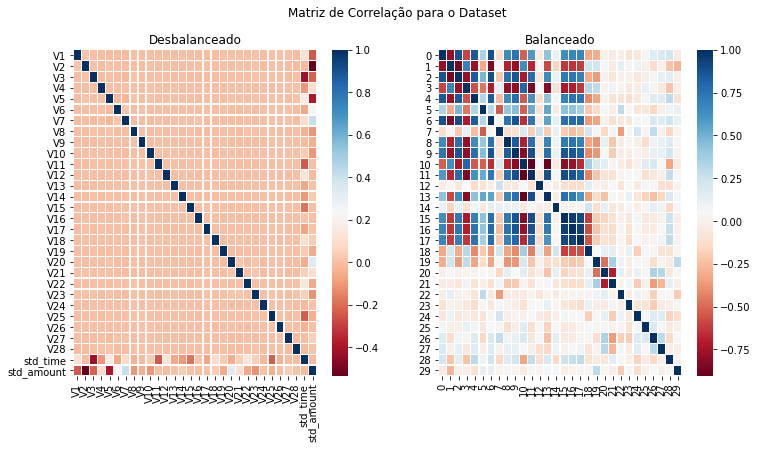

In [19]:
corr = X_train.corr()
corr_rand = pd.DataFrame(X_rand).corr()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,6))
fig.suptitle ('Matriz de Correlação para o Dataset')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.3, cmap="RdBu", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rand, xticklabels=corr_rand.columns, yticklabels=corr_rand.columns,
            linewidths=.3, cmap="RdBu", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show;

Observa-se que utilizando o dataset balanceado obtemos maior correlação entre os dados.

## Modelo de Machine Learning




### Sklearn:

#### Regressão Logística

A Regressão Logística serve para classificar algo dentro de um conjunto de categorias.

Portanto para o nosso modelo é um bom ponto de partida, pois trabalha com probabilidades. No caso, após treinar o modelo conseguiríamos ver qual a probabilidade de uma transação ser normal ou uma fraude.

In [20]:
#1. Escolher o modelo
from sklearn.linear_model import LogisticRegression

#2. Instanciar o modelo
np.random.seed(2)
model_lr = LogisticRegression()

#3. Fit do modelo
model_lr.fit(X_rand, y_rand)

#5. Fazer previsões em cima dos novos daos
y_pred_lr = model_lr.predict(X_test)
y_prob_lr = model_lr.predict_proba(X_test)

#### Árvore de Decisão

Uma Decision Tree é construída a partir de um processo de indução, que vai dividindo os dados em subconjuntos cada vez mais puros. Para selecionar os atributos que irão compor a árvore, são considerados o grau de entropia de um nó e a informação ganha a mais após um split.

In [54]:
#1. Escolha do modelo
from sklearn.tree import DecisionTreeClassifier

#2. Instanciar o modelo e escolher os hyperparametros
model_tree = DecisionTreeClassifier(max_depth=4, criterion="entropy")

#3. Fit do modelo
model_tree.fit(X_rand, y_rand)

#Fazer previsões em cima dos novos dados
y_pred_tree = model_tree.predict(X_test)

Apenas como curiosidade podemos plotar a árvore de decisão:


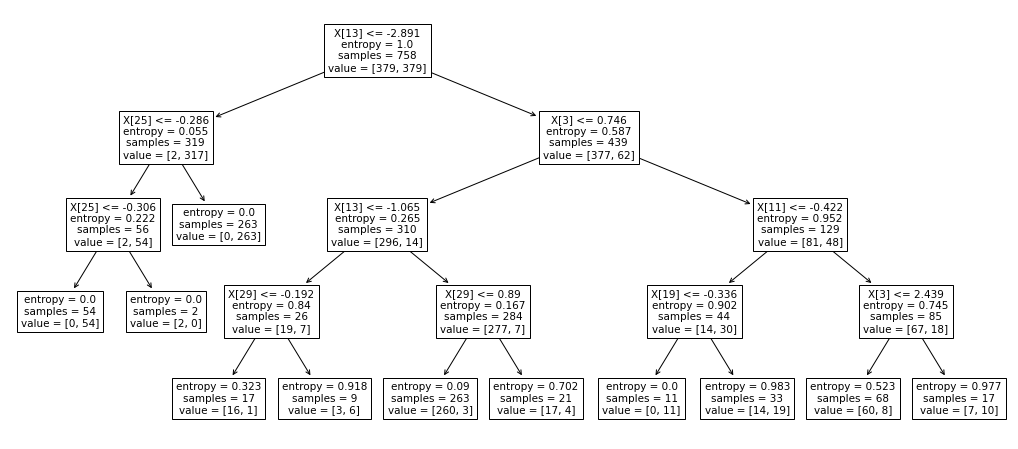

In [55]:
from sklearn import tree
plt.figure(figsize=(18,8))#ajustar o tamanho da figura
tree.plot_tree(model_tree); #utilizando a própria biblioteca sklearn podemos plotar a árvore.


Com o dataset separado, experimentamos alguns modelos de Machine Learning.

Já fizemos o treino do modelo e as previsões utilizando nossos modelos, podemos partir para as avaliações e comparações de desempenho. 

Lembre-se: *Aquilo que não se mede, não se controla!*

### Avaliar o desempenho utilizando Sklearn



#### Matriz de Confusão Analítica
Vamos verificar o modelo de classificação (`matrix de confusão`).

In [56]:
print("Utilizando Regressão Logística: \n" )
print(classification_report(y_test, y_pred_lr))

print("Utilizando Árvore de Decisão: \n")
print(classification_report(y_test, y_pred_tree))

Utilizando Regressão Logística: 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71089
           1       0.04      0.93      0.08       113

    accuracy                           0.96     71202
   macro avg       0.52      0.95      0.53     71202
weighted avg       1.00      0.96      0.98     71202

Utilizando Árvore de Decisão: 

              precision    recall  f1-score   support

           0       1.00      0.88      0.94     71089
           1       0.01      0.91      0.02       113

    accuracy                           0.88     71202
   macro avg       0.51      0.90      0.48     71202
weighted avg       1.00      0.88      0.94     71202



Podemos observar que o modelo utilizando `Regressão Logística` apresentou um F1-Score de 96%.

Podemos observar que o modelo utilizando `Árvore de Decisão` apresentou um F1-Score de 88%.

Sendo a métrica F1-Score a média harmônica  entre precisão e recall.
* Precisão: Positivos verdadeiros
* Recall: Razão entre positivos verdadeiros e o total de verdadeiros.

Neste tipo de problema, originalmente desbalanceado, a acurácia não é uma métrica adequada. Como explicado [neste artigo](http://sigmoidal.ai/como-lidar-com-dados-desbalanceados/), você pode ter uma acurácia de 99,88% e detectar menos de 60% das fraudes.

Adiante iremos plotar a matriz de confusão para ver a taxa de acertos para transações fraudulentas, ou pela coluna *recall* do Relatório de Classificação. 

#### Matriz de Confusão Gráfica

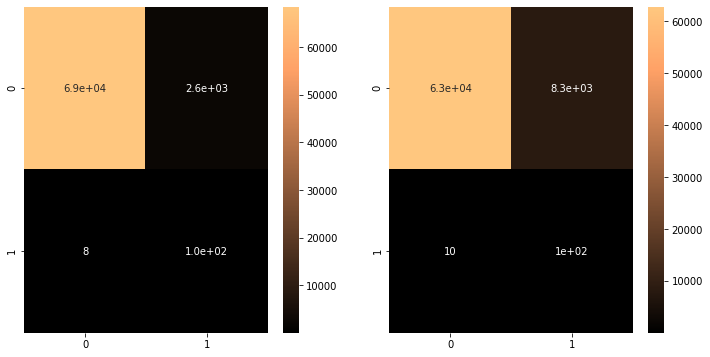

In [57]:
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr) #gerar matriz de confusão para regressão logística
confusion_matrix_tree = confusion_matrix(y_test, y_pred_tree)  #gerar matriz de confusão para árovre de decisão

fig, (ax,ax2) = plt.subplots(ncols=2, figsize=(12,6))

sns.heatmap(confusion_matrix_lr, ax=ax, annot=True, cmap=plt.cm.copper)
ax.set_title = ("Matriz de Confusão \n Regressã Logística")
ax.set_ylabel = ("Verdadeiros")
ax.set_xlabel = ("Positivos")

sns.heatmap(confusion_matrix_tree, ax=ax2, annot=True, cmap=plt.cm.copper)
ax2.set_title = ("Matriz de Confusão \n Árvore de decisão")
ax2.set_ylabel = ("Verdadeiros")
ax2.set_xlabel = ("Positivos")

plt.show()

#### AUC ROC

Uma outra métrica considerada interessante para se avaliar a eficácia é a [AUC ROC](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772), ou área sob a curva. 
Podemos solicitar também a acurácia para cada modelo e compará-la com a respectiva AUC ROC:

In [58]:
# imprimir a acurácia do modelo
print("Acurácia utilizando regressão logística: {:.4f}".format(accuracy_score(y_test, y_pred_lr)))
print("Acurácia utilizando árvore de decisão: {:.4f}\n".format(accuracy_score(y_test, y_pred_tree)))

# imprimir a área sob da curva
print("\nAUC ROC utilizando regressão logística: {:.4f}".format(roc_auc_score(y_test, y_pred_lr)))
print("AUC ROC utilizando árvore de decisão: {:.4f}\n".format(roc_auc_score(y_test, y_pred_tree)))

Acurácia utilizando regressão logística: 0.9641
Acurácia utilizando árvore de decisão: 0.8833


AUC ROC utilizando regressão logística: 0.9467
AUC ROC utilizando árvore de decisão: 0.8974



Apesar dos resultados expressivos não podemos deixar nos enganar. Um modelo de machine learning testado apenas uma vez e já apresentar um resultado surpreendente é questionável!

### Tensor Flow
O foco principal aqui será explorar a biblioteca TensorFlow e verificar como um simples rede neural se comporta classificando dados desbalanceados:


Importando as bibliotecas necessárias:

In [73]:
import keras
from keras import backend as K 
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_entradas = X_train.shape[1]

keras_model = Sequential([
         Dense(n_entradas, input_shape=(n_entradas, ), activation='relu'),
         Dense(32, activation='relu'),
         Dense(2, activation='softmax')                 
])

`ReLu` é a função de ativação amplamente utilizada ao projetar redes neurais. Por se tratar de uma função *não linear* podemos facilmente copiar os erros para trás e ter várias camadas de neurônios ativadas.

A principal vantagem sobre é função `ReLu` sobre as outras funções de ativação é que ela não ativa todos os neurônios ao mesmo tempo, gerando eficiência na utilização dos recursos.

Já a função `softmax` converte todos as variáveis reais em probabilidades categóricas. Os elementos do vetor alvo estão no intervalo de 0 a 1 e a somatória é 1. 

Normalmente utilizado na última camada de ativação pois o resultado pode ser interpretado como uma distribuição probabilística.

#### Sumário do modelo

A biblioteca permite sumarizar o modelo. Facilitando a visualização dos layers e a sequência, saída de cada layer, o número de parâmetros (peso) de cada layer, o total de parâmetros do modelo

In [74]:
keras_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


Podemos ainda plotar o sumário:


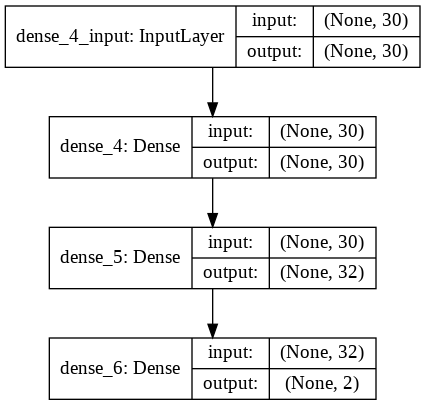

In [92]:
from keras.utils.vis_utils import plot_model
plot_model(keras_model, show_shapes=True, show_layer_names=True)

#### Compilando e treinando o modelo

In [75]:
keras_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [76]:
keras_model.fit(X_rand, y_rand, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Train on 606 samples, validate on 152 samples
Epoch 1/20
 - 0s - loss: 0.5069 - accuracy: 0.7475 - val_loss: 0.1873 - val_accuracy: 0.9013
Epoch 2/20
 - 0s - loss: 0.3289 - accuracy: 0.9158 - val_loss: 0.2124 - val_accuracy: 0.8553
Epoch 3/20
 - 0s - loss: 0.2626 - accuracy: 0.9241 - val_loss: 0.2004 - val_accuracy: 0.8947
Epoch 4/20
 - 0s - loss: 0.2257 - accuracy: 0.9241 - val_loss: 0.2013 - val_accuracy: 0.9079
Epoch 5/20
 - 0s - loss: 0.2024 - accuracy: 0.9323 - val_loss: 0.1962 - val_accuracy: 0.9145
Epoch 6/20
 - 0s - loss: 0.1838 - accuracy: 0.9340 - val_loss: 0.2157 - val_accuracy: 0.9013
Epoch 7/20
 - 0s - loss: 0.1729 - accuracy: 0.9356 - val_loss: 0.1883 - val_accuracy: 0.9211
Epoch 8/20
 - 0s - loss: 0.1618 - accuracy: 0.9373 - val_loss: 0.1868 - val_accuracy: 0.9276
Epoch 9/20
 - 0s - loss: 0.1546 - accuracy: 0.9389 - val_loss: 0.1895 - val_accuracy: 0.9276
Epoch 10/20
 - 0s - loss: 0.1499 - accuracy: 0.9439 - val_loss: 0.1763 - val_accuracy: 0.9342
Epoch 11/20
 - 0s - los

In [78]:
keras_pred = keras_model.predict(X_rand, batch_size=200, verbose=0)

In [79]:
keras_fraud_pred = keras_model.predict_classes(X_rand, batch_size=200, verbose=0)

#### Avaliando o Desempenho

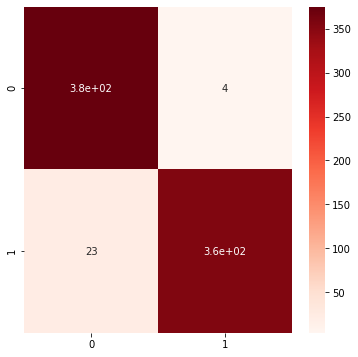

In [81]:
keras_cm = confusion_matrix(y_rand, keras_fraud_pred)

fig, ax = plt.subplots(figsize=(6,6))

sns.heatmap(keras_cm, ax=ax, annot=True, cmap=plt.cm.Reds)
ax.set_title = ("Random UnderSample (RUS) \n Confusion Matrix")
ax.set_ylabel = ("Verdadeiros")
ax.set_xlabel = ("Positivos")

plt.show()

In [91]:
print("A acurácia do modelo utilizando TensorFlow é de: {:%}" .format(keras_pred[0][0]))

A acurácia do modelo utilizando TensorFlow é de: 98.725265%


## Conclusão

Podemos observar que mesmo com um dataset sem valores ausentes e com dados normalizados não se trata de um problema trivial. 

Além disso, nossos dados de amostra são insuficiente, nosso modelo não consegue detectar corretamente muitos casos de transações não fraudulentas e, em vez disso, classifica incorretamente essas transações não fraudulentas como casos de fraude. Imagine que as pessoas que estavam fazendo compras regulares tiveram seu cartão bloqueado devido ao motivo pelo qual nosso modelo classificou essa transação como uma transação de fraude, isso será uma enorme desvantagem para a instituição financeira. 

Ainda há muito espaço para otimizações no modelo, ajustes dos hiper-parmetros e campos para estudos, porém com a velocidade que as transações ocorrem, os formas de detecção de fraude tornam-se cada vez mais inteligentes.

Grandes empresas de cartões de crédito implementam áreas robustas para estudar modelos e ajustá-los conforme crescimento da base de dados. Esse é um campo muito fértil e financeiramente viável de estudos relacionados a DataScience.





---

Esse notebook faz parte da trilha de conhecimento do curso:
# **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

Para saber mais clique no [link](https://cursos.sigmoidal.ai/) 


<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

---